# ------------------------------------------------------------------------------------------------------------

# Final Project Year 1 Semester 1

# ------------------------------------------------------------------------------------------------------------

<center> <h1>Target Classification for a Market Campaign</h1> </center>

### What is this dataset trying to predict?<br>
If given data about a client we can predict if he will subsrice to a term deposit or not

### What is a Term depost?<br>
In a normal bank acount the client has the option to witdraw money from the acount at any given time.<br> A Term deposit is a fixed-term investment which means the client has to leave money in the bank without the option to withdraw from it for a fixed period/

### What is in it for me and  the bank?
The Banks are willing to pay more interest for a term deposit.<br>
The money will stay deposited for a fixed time period, This helps them better manage their money.

## Feature Description

### Bank client data

Age: age of the client

Job: type of job :admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown

Marital: is the martial status of the client:married,single,divorced

Education: the level of education of the target: primary(elemetary school),secondary(middle school or high school in US),tertiary (any level of education pursued beyond high school),unknown

Default: has credit in default?

Balance: The clients saving in the bank

Housing: has housing loan?

loan: has personal loan?


### Related to last contact of current campaign:

Contact: contact communication type: cellular, telephone

Day:  last contact day of the month : mon, tue, wed , thu , fri

Month:  last contact month of year: jan, feb,...., nov, dec.

Duration:  last contact duration, in seconds (numeric). this feature affects the model to much cause it basically we want to predict to answer before the last contact.

### Other attributes

Campaign: number of contacts performed during this campaign and for this client(includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 means 'was not previously contacted)

Previous: number of contacts performed before this campaign and for this client

Poutcome: outcome of the previous marketing campaign -failure, nonexistent, success

### Target

deposit: Tells if the bank client subscribed a term depsit

## Libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## First look

In [3]:
bank = pd.read_csv('csv folder/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
bank.shape

(11162, 17)

<center> <h1>Data preprocessing</h1> </center>

**Steps involves in Data Preprocessing**
- Data Cleaning
- Identifying and removing outliers(visulazition)
- Endcoding categorial variables

### Data Cleaning

In [72]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There data seems already clean, lets check!

In [73]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Yes, the data is alreday clean

### Identifying and removing outliers

The first thing we have to do is to drop the feature 'duration' which is the duration of the last contact
which gives us too much knowledge of the answer and as same time we want to predict if the client subscribes for term deposit before our last contact with him.

In [210]:
bank = bank.drop(['duration'], axis = 1)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [211]:
bank.describe()

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [306]:
bank.age.count()

11118

This guves us an even better picture about the datasets and the clients
1. About Age we can tell that most clients are between 30 and 50 with the mean and std 
2. We know all clients are at a legal age(18 and above)thanks to min
3. The mean in ballance is 1528 while median is just 550 and max is at 81k this is still in the realm of possibility
4. most clients havent been contacted for at least half a month(day, mean)
5. all clients have been contacted at least 1 time (campaign, min)
6. mean of pdays is at 51 yet median at -1 which even 75% is just at 20, some clients had a lot of inluenc of the mean, some cap has to be put
7. more than half of the clients have never been contacted in the previous campaign (pdays, 50%)

In [268]:
#lest check if there is a Feature with only one value
bank.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3798
housing         2
loan            2
contact         3
day            31
month          12
campaign       36
pdays         431
previous       32
poutcome        4
deposit         2
dtype: int64

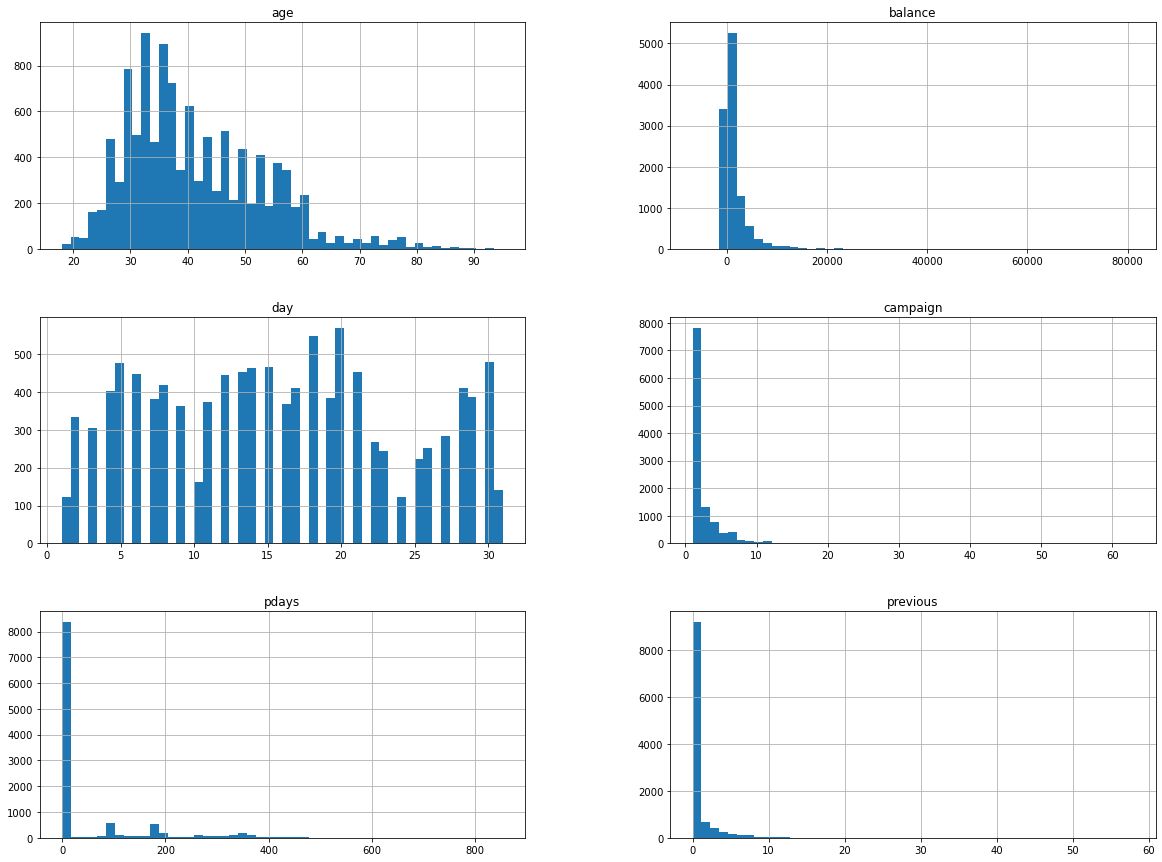

In [212]:
bank.hist(bins=50, figsize = (20,15))
plt.show()

Some thinks seem to be diffrent when we watch the histograms
1. The mean for balance seems to be influced by people with a lot money 
2. we can clearly see that most have probably never been contacted and the ones with over half a year of no contact wil probaly not want one any more.
3. Prevous seems to have some anomolys


<AxesSubplot:xlabel='age'>

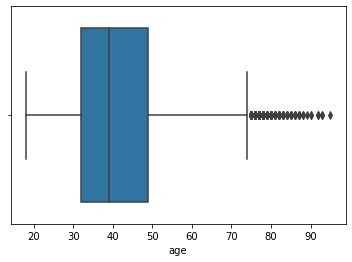

In [318]:
#we need to know what is the amount of anomolys
sns.boxplot(x = 'age', data = bank)

In [345]:
print("numer of anomolys above and 75:",format((bank.age >=75).sum()))
print("numer of anomolys above and 80:",format((bank.age >=80).sum()))
print("numer of anomolys above and 85:",format((bank.age >=85).sum()))
print("numer of anomolys above and 90:",format((bank.age >=90).sum()))

numer of anomolys above and 75: 171
numer of anomolys above and 80: 72
numer of anomolys above and 85: 24
numer of anomolys above and 90: 7


<AxesSubplot:xlabel='balance'>

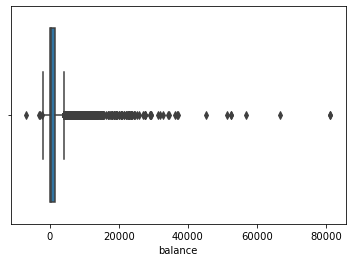

In [326]:
sns.boxplot(x = 'balance', data=bank)

In [328]:
#there seem to be some heavier anomolys from 40k and on
print("numer of anomolys above 40k:",format((bank.balance >40000).sum()))
print("numer of anomolys above 30k:",format((bank.balance >30000).sum()))
print("numer of anomolys above 20k:",format((bank.balance >20000).sum()))
print("numer of anomolys above 10k:",format((bank.balance >10000).sum()),"which is ",round((bank.balance >10000).sum()/bank.age.count(),3),"% of the data set")

numer of anomolys above 40k: 8
numer of anomolys above 30k: 16
numer of anomolys above 20k: 57
numer of anomolys above 10k: 227 which is  0.02 % of the data set


<AxesSubplot:xlabel='campaign'>

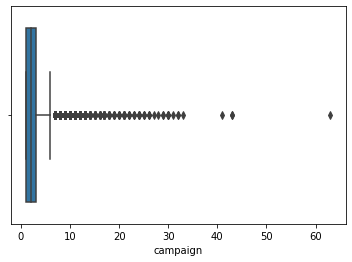

In [329]:
sns.boxplot(x = 'campaign', data=bank)

In [336]:
print("numer of anomolys above 30:",format((bank.campaign >30).sum()))
print("numer of anomolys above 20:",format((bank.campaign >20).sum()))
print("numer of anomolys above 10:",format((bank.campaign >10).sum()))

numer of anomolys above 30: 8
numer of anomolys above 20: 42
numer of anomolys above 10: 210


<AxesSubplot:xlabel='previous'>

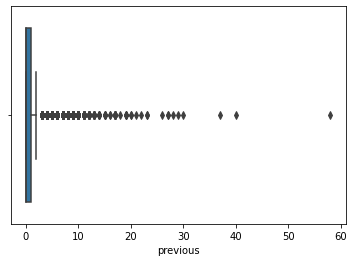

In [346]:
sns.boxplot(x = 'previous', data=bank)

In [354]:
print("numer of anomolys above 30:",format((bank.previous >30).sum()))
print("numer of anomolys above 20:",format((bank.previous >20).sum()))
print("numer of anomolys above 10:",format((bank.previous >10).sum()))

numer of anomolys above 30: 5
numer of anomolys above 20: 15
numer of anomolys above 10: 96


<AxesSubplot:xlabel='pdays'>

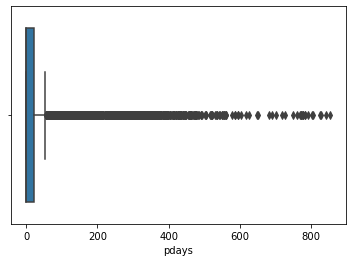

In [351]:
sns.boxplot(x = 'pdays', data=bank)

In [353]:
print("number of anomolys with pday above half a year:",format((bank.pdays > 534).sum()))
print("number of anomolys with pday above w year:",format((bank.pdays > 712).sum()))

number of anomolys with pday above half a year: 44
number of anomolys with pday above w year: 19


We have seen that the Data set has huge amount anomolys but that only means when probably cant look at them like anomolys, but i still want to put some cap on the data set because there seem to be anomolys in anomolys

**Who will be removed by the cap**
- Age: clients above 90
- Balance: clients with balance higher than 40k
- Campaign: clients above 30
- Previous: clients above 30
- Pdays: clients above 2 years

In [355]:
bank = bank.drop(bank[bank['age'] > 90].index)
bank = bank.drop(bank[bank['balance'] > 40000].index)
bank = bank.drop(bank[bank['campaign'] > 30].index)
bank = bank.drop(bank[bank['previous'] > 30].index)
bank = bank.drop(bank[bank['pdays'] > 712].index)

### Lets look at categoric data

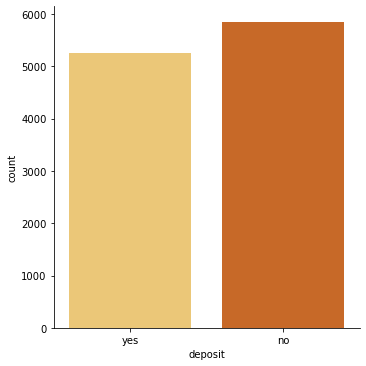

In [358]:
sns.catplot(x = "deposit", kind = "count", palette = "YlOrBr" , data = bank)

The data set seem the be fairly distrubaited in terms of deposit

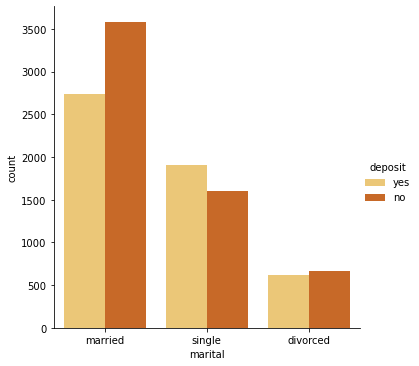

In [402]:
sns.catplot(x = "marital", kind = "count",hue="deposit", palette = "YlOrBr" , data = bank)

- Single people are actullay the most likely to term a deposit
- More than half of Married and divored people dont got a deposit

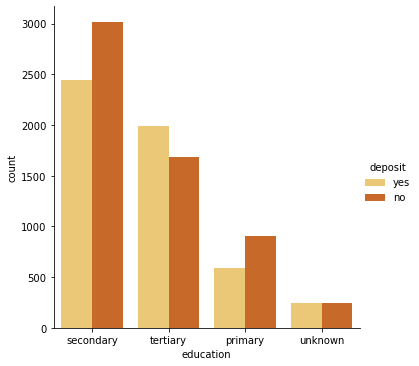

In [405]:
sns.catplot(x = "education", kind = "count",hue="deposit", palette = "YlOrBr" , data = bank)

A higher education rises the probablity to subcribe to a term deposit

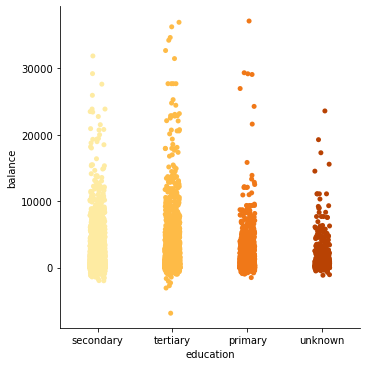

In [408]:
sns.catplot(x = "education",y='balance', palette = "YlOrBr" , data = bank)

- people with teritary and secondary education have more or less the same balance
- while primary seems to be less in balance we cant really know, maybe its just because we a lesser amount of them

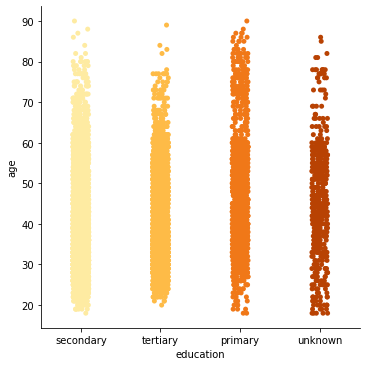

In [409]:
sns.catplot(x = "education", y = 'age', palette = "YlOrBr" , data = bank)

- expect for unknown it seem the amount of people in the 70's and 80's matter
- people with  primry education come with all ages.
- it seem most clients of 18 and higher have a secondary education
- teritary education actully has the least people

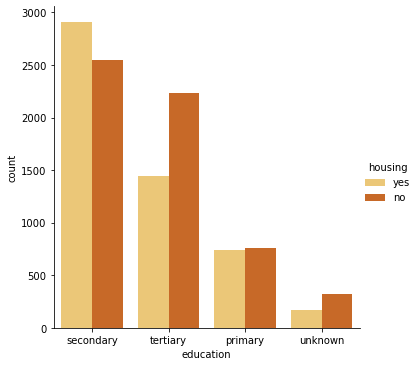

In [412]:
sns.catplot(x = "education", kind = "count",hue="housing", palette = "YlOrBr" , data = bank)

Very logical

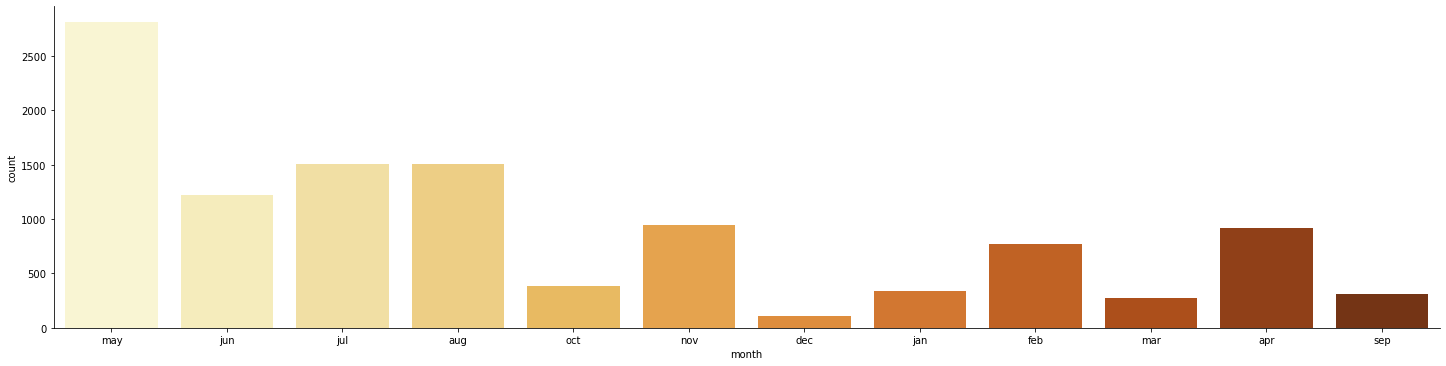

In [385]:
sns.catplot(x = "month", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

Most people get contacted between may to aug and nov

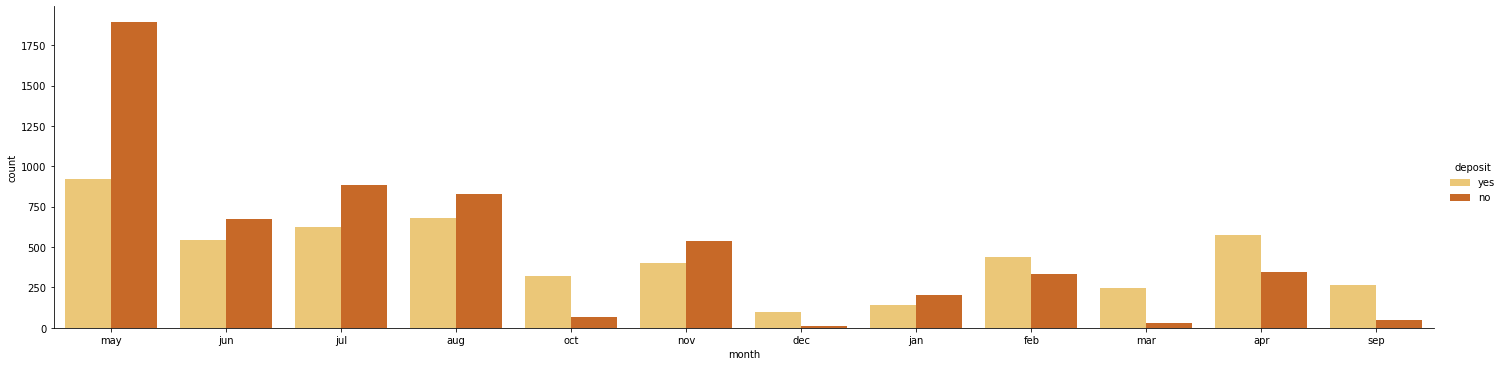

In [396]:
sns.catplot(x = "month", hue="deposit", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

We can see that may to aug and nov also has the lowest chance to get people to subscribe to a Term Deposit espically may<br>And actually the other months have a much ratio

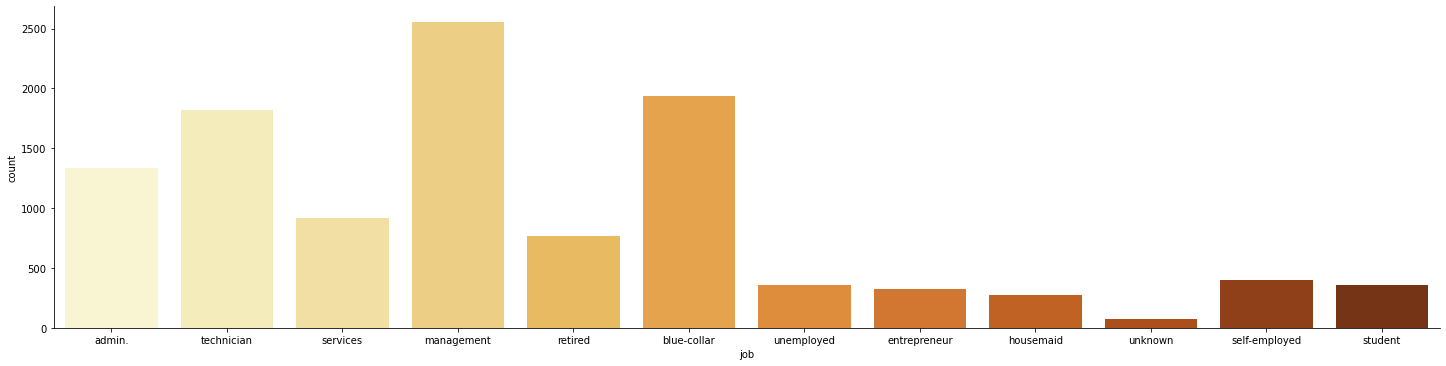

In [384]:
sns.catplot(x = "job", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

admin,technician,managmenta and bluecollar seem to get most contact with the campaing

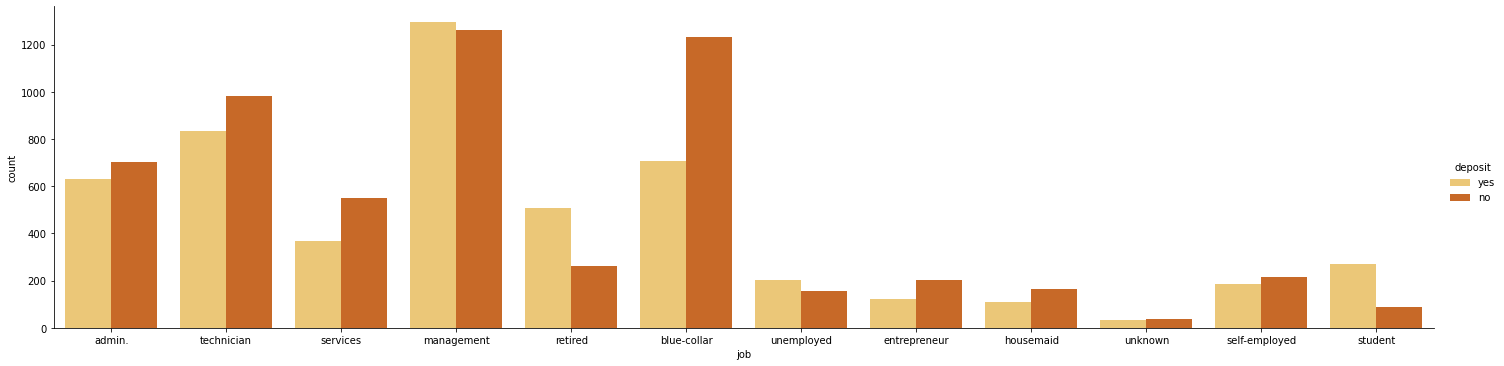

In [395]:
sns.catplot(x="job", hue="deposit", kind="count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

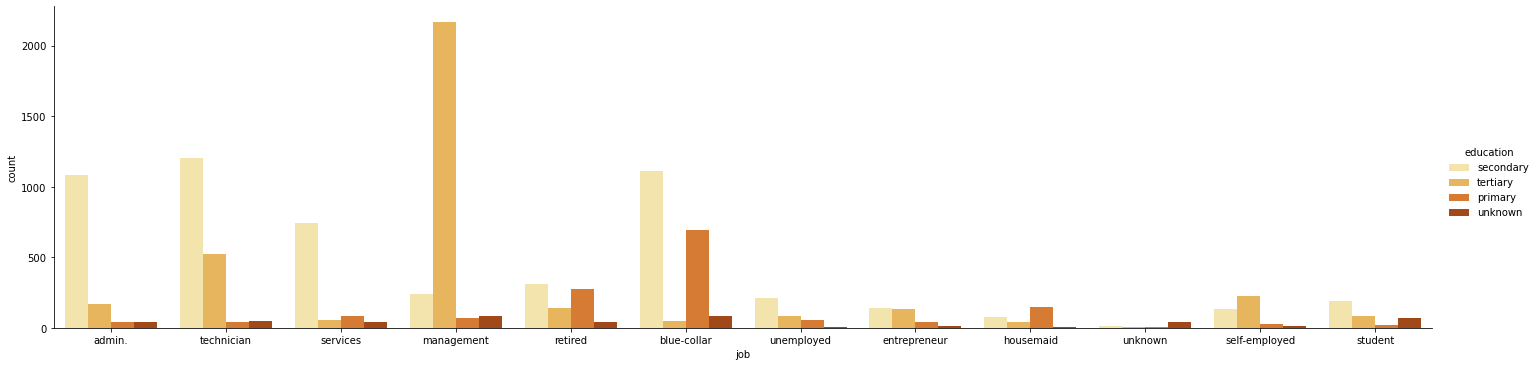

In [415]:
sns.catplot(x="job", hue="education", kind="count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

- blue collar has highest amount of people with primary education which explains the low  amount of people with a term deposit
- We can understand why admin,technichian, and servies have a higher probabilty to get a term deposit
- managment has the highest ratio of people with higher education(tertiary)
- Students have the best ratio for getting Term deposits

**Small Summary**
- The higher the education the higher probabilty to get a term deposit
- People who married or were married are less to get a deposit
- May to Aug is the worst time to contact clients for a deposit
- People with a teritiary education are less likly to hava house loan
- Of the given jobs Managment has the highest amount of people with a teritiary education
- It seems people with lower responsibilties are more likely to term a deposit

### Encoding categorical variables

In [5]:
# Get list of categorical variables
cat = (bank.dtypes =="object")
object_cols = list(cat[cat].index)

# Make copy to avoid changing original data
label_bank = bank.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_bank[col] = label_encoder.fit_transform(label_bank[col])
label_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


<center><h1>Model Training<h1><center>

In [6]:
X= label_bank.drop(["deposit"],axis =1)
y= label_bank["deposit"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

### K-Nearest-Neighbor

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1765
           1       0.74      0.73      0.74      1584

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349

Accuracy:  0.7539564048969841


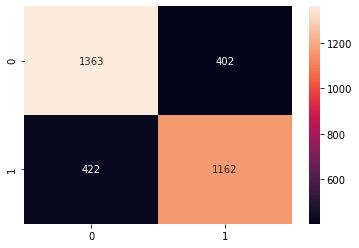

In [233]:
#fit the model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
#make predictions
Y_pred1 = knn.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred1)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred1)
acc_score1 = accuracy_score(y_test, Y_pred1)
print(class_rep1)
print("Accuracy: ", acc_score1)

#for comparison
Knn_old_Result = acc_score1

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1765
           1       0.76      0.76      0.76      1584

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

Accuracy:  0.774260973424903


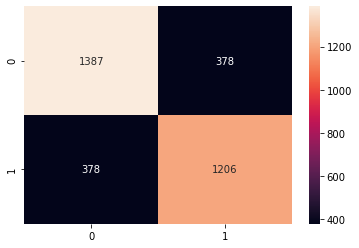

In [234]:
#fit the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
#make predictions
Y_pred3 = dtree.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred3)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred3)
acc_score1 = accuracy_score(y_test, Y_pred3)
print(class_rep1)
print("Accuracy: ", acc_score1)

#for comparison
dtree_old_Result = acc_score1

### Logistic Regression

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1765
           1       0.77      0.71      0.74      1584

    accuracy                           0.76      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

Accuracy:  0.7644072857569424


C:\Users\Inons\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


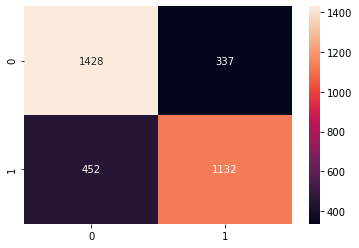

In [238]:
#fit the model
logisticR = LogisticRegression()
logisticR.fit(X_train,y_train)
#make predictions
Y_pred2 = logisticR.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred2)
acc_score1 = accuracy_score(y_test, Y_pred2)
print(class_rep1)
print("Accuracy: ", acc_score1)

#for comparison
logR_old_Result = acc_score1

In [242]:
#Getting all scores
old_Results = [Knn_old_Result,dtree_old_Result,logR_old_Result]

# ------------------------------------------------------------------------------------------------------------

# Final Project Year 1 Semester 2

# ------------------------------------------------------------------------------------------------------------

## Libraries :

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [21]:
# Make a copy to avoid changing original data
bankCopy = bank.copy()

#first lets split the data for training and testing
X= bankCopy.drop(["deposit"],axis =1)
y= bankCopy["deposit"]\

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

We need the list of all categorial and numeric features for the column transformation

In [116]:
# Get all features
feature_columns = list(X.columns)

# Get a list of all categorical features
cat = (X.dtypes =="object")
cat_features = list(cat[cat].index)

# Get a list of all numerical features
num_features = [ col for col in feature_columns if not col in cat_features ]


cat_features, num_features

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

We will first create a preprocessing pipeline

In [117]:
preprocessor = ColumnTransformer(transformers = [
    ('num',MinMaxScaler(),num_features),
    ('cat',OneHotEncoder(),cat_features)])

I made a another pipeline which used in addition PCA but because the data itself doesnt have a lot of features or data so that much data is getting lost durn the transfomation, all training models got a very bad accruac. So i Removed it

### Transforming the Data

We will transform the data using the pipeline

In [118]:
# we will preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[0.58666667, 0.0900728 , 0.43333333, ..., 0.        , 0.        ,
        1.        ],
       [0.49333333, 0.07776175, 0.56666667, ..., 0.        , 0.        ,
        1.        ],
       [0.26666667, 0.10577961, 0.03333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.13333333, 0.07779582, 0.43333333, ..., 1.        , 0.        ,
        0.        ],
       [0.30666667, 0.08304278, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.36      , 0.08202065, 0.7       , ..., 0.        , 0.        ,
        0.        ]])

## Model training

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

This next function prints out the Result of the grid search in an orderly manner
- On the list of all the result, the first acuracy score is of the train set and the second of the test set, so that it is possible to see if there is overfitting

In [164]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def grid_search(model, grid_param):
    print("Obtaining Best Model for {}".format(model.__class__.__name__))
    grid_search = GridSearchCV(model, grid_param, cv=kf, scoring='accuracy', return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Scores: ", grid_search.best_score_)
    
    cvres = grid_search.cv_results_
    print("\nResults for each run of {}...".format(model.__class__.__name__))
    for train_mean_score, test_mean_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
        print(train_mean_score, test_mean_score, params)
        
    return grid_search.best_estimator_

###### Workflow:

- We will have a first look at the accruacy score for every training model without fine tuning the model

- Get a better estimation of the model using Cross Validation

- Use grid Search to fine tune the model


### Logistic Regression

###### First look

Accuracy went from 77 last year to 81.9 so the preprocessing led to a huge improvment


              precision    recall  f1-score   support

          no       0.82      0.85      0.83      1765
         yes       0.82      0.79      0.80      1584

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy:  0.8190504628247238


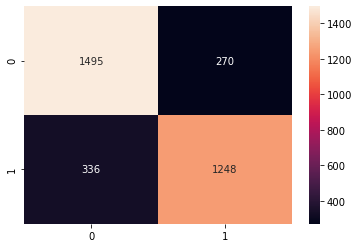

In [147]:
#fit the model
logR = LogisticRegression(random_state=42, n_jobs=-1)
logR.fit(X_train_transformed,y_train)

#make predictions
PredicLogR = logR.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicLogR)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicLogR)
acc_score1 = accuracy_score(y_test, PredicLogR)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [148]:
logR_meanVscore = cross_val_score(logR, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", logR_meanVscore)

Mean Accuracy:  0.8217077372628723


###### Grid Search

In [178]:
logR_param_grid = [{'C':[0.01, 0.1, 1, 10], 'penalty':['l2']}]
logR_grid_Search = grid_search(logR, logR_param_grid)

Obtaining Best Model for LogisticRegression
Best Parameters:  {'C': 10, 'penalty': 'l2'}
Best Scores:  0.826313116294463

Results for each run of LogisticRegression...
0.7291372823548233 0.7248170931012703 {'C': 0.01, 'penalty': 'l2'}
0.799820608542633 0.7966192431738104 {'C': 0.1, 'penalty': 'l2'}
0.82557899600064 0.8215778121295679 {'C': 1, 'penalty': 'l2'}
0.8293548987362023 0.826313116294463 {'C': 10, 'penalty': 'l2'}


### KNN

###### First look

Accuracy went from 75 last year to 73 so the preprocessing made it worse

              precision    recall  f1-score   support

          no       0.72      0.81      0.76      1765
         yes       0.76      0.65      0.70      1584

    accuracy                           0.74      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.74      0.73      3349

Accuracy:  0.7351448193490594


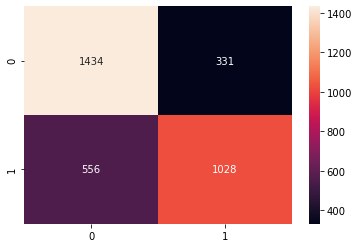

In [155]:
#fit the model
Knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
Knn.fit(X_train_transformed,y_train)

#make predictions
PredicKnn = Knn.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicKnn)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicKnn)
acc_score1 = accuracy_score(y_test, PredicKnn)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [137]:
Knn_meanVscore = cross_val_score(Knn, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", Knn_meanVscore)

Mean Accuracy:  0.727631864589503


###### Grid Search

In [180]:
Knn_param_grid = [{'n_neighbors':[10,12,14,16,18], 'algorithm':['auto', 'kd_tree']}]
Knn_grid_Search = grid_search(Knn, Knn_param_grid)

Obtaining Best Model for KNeighborsClassifier
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 18}
Best Scores:  0.7266072091245782

Results for each run of KNeighborsClassifier...
0.7699665691889297 0.7200798228561739 {'algorithm': 'auto', 'n_neighbors': 10}
0.7634069070548712 0.7205913313885522 {'algorithm': 'auto', 'n_neighbors': 12}
0.7601111067029276 0.7244311679417516 {'algorithm': 'auto', 'n_neighbors': 14}
0.7571672398016318 0.7246879052480415 {'algorithm': 'auto', 'n_neighbors': 16}
0.7546074087346024 0.7266072091245782 {'algorithm': 'auto', 'n_neighbors': 18}
0.7699665691889297 0.7200798228561739 {'algorithm': 'kd_tree', 'n_neighbors': 10}
0.7634069070548712 0.7205913313885522 {'algorithm': 'kd_tree', 'n_neighbors': 12}
0.7601111067029276 0.7244311679417516 {'algorithm': 'kd_tree', 'n_neighbors': 14}
0.7571672398016318 0.7246879052480415 {'algorithm': 'kd_tree', 'n_neighbors': 16}
0.7546074087346024 0.7266072091245782 {'algorithm': 'kd_tree', 'n_neighbors': 18}


### Desicion tree

###### First look

Accuracy went from 76 last to 78 so the preprocessing did help

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1765
           1       0.76      0.79      0.77      1584

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Accuracy:  0.7799343087488803


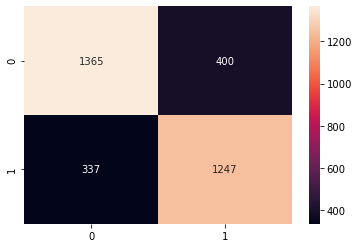

In [100]:
#fit the model
dTree = DecisionTreeClassifier(random_state=42)
dTree.fit(X_train_transformed,y_train)

#make predictions
PredicDeTree = dTree.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicDeTree)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicDeTree)
acc_score1 = accuracy_score(y_test, PredicDeTree)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [136]:
dTree_meanVscore = cross_val_score(dTree, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", dTree_meanVscore)

Mean Accuracy:  0.7825393236520267


###### Grid Search

In [183]:
dTree_param_grid = [{'criterion':['gini','entropy'],'max_depth':[6,8,10,16,20]}]
dTree_grid_Search = grid_search(dTree, dTree_param_grid)

Obtaining Best Model for DecisionTreeClassifier
Best Parameters:  {'criterion': 'gini', 'max_depth': 8}
Best Scores:  0.8224734435812806

Results for each run of DecisionTreeClassifier...
0.828394919212926 0.8130046374916748 {'criterion': 'gini', 'max_depth': 6}
0.8560414039353702 0.8224734435812806 {'criterion': 'gini', 'max_depth': 8}
0.8860554228123501 0.8195318599200625 {'criterion': 'gini', 'max_depth': 10}
0.9628504060150375 0.7994365541823031 {'criterion': 'gini', 'max_depth': 16}
0.9878088497840345 0.7899670927326302 {'criterion': 'gini', 'max_depth': 20}
0.8131957536394177 0.7954698235361098 {'criterion': 'entropy', 'max_depth': 6}
0.8418338953767398 0.8068600634224705 {'criterion': 'entropy', 'max_depth': 8}
0.8700560831866901 0.8076274081410466 {'criterion': 'entropy', 'max_depth': 10}
0.9423713172292434 0.8004605542871609 {'criterion': 'entropy', 'max_depth': 16}
0.9757134282514798 0.7907343555311981 {'criterion': 'entropy', 'max_depth': 20}


### Random Forest

###### First look

Accuracy is at 85.8 which very high considring 86.4 is the highest i have seen on kaggle

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1765
           1       0.82      0.89      0.86      1584

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349

Accuracy:  0.8581666169005673


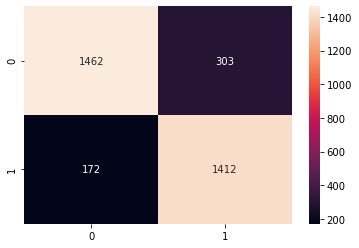

In [101]:
#fit the model
RFor = RandomForestClassifier(random_state=42)
RFor.fit(X_train_transformed,y_train)

#make predictions
PredicRFor = RFor.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicRFor)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicRFor)
acc_score1 = accuracy_score(y_test, PredicRFor)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [135]:
Rfor_meanVscore = cross_val_score(RFor, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", Rfor_meanVscore)

Mean Accuracy:  0.8476881764032692


###### Grid Search

In [166]:
RFor_param_grid = [{'max_depth':[8, 12, 16, 20], 'max_features':[None, 'sqrt', 'auto']}]
RFor_grid_Search = grid_search(RFor, RFor_param_grid)

Obtaining Best Model for RandomForestClassifier
Best Parameters:  {'max_depth': 16, 'max_features': None}
Best Scores:  0.8539598084054845

Results for each run of RandomForestClassifier...
0.8732559654455286 0.8393694453114312 {'max_depth': 8, 'max_features': None}
0.8744079040153576 0.8360406257705602 {'max_depth': 8, 'max_features': 'sqrt'}
0.8744079040153576 0.8360406257705602 {'max_depth': 8, 'max_features': 'auto'}
0.9439074144936811 0.8492238488805223 {'max_depth': 12, 'max_features': None}
0.9274606533354663 0.8455114798603756 {'max_depth': 12, 'max_features': 'sqrt'}
0.9274606533354663 0.8455114798603756 {'max_depth': 12, 'max_features': 'auto'}
0.9857928600223964 0.8539598084054845 {'max_depth': 16, 'max_features': None}
0.9771854999200127 0.8507587840776996 {'max_depth': 16, 'max_features': 'sqrt'}
0.9771854999200127 0.8507587840776996 {'max_depth': 16, 'max_features': 'auto'}
0.9979521484562468 0.8529357263806183 {'max_depth': 20, 'max_features': None}
0.997408148456247 0.8

if we took the best paramaters there will be overfitting lets take other paramaters

In [194]:
RFor_grid_Search.max_depth = 8
RFor_grid_Search.max_features = 'auto'
RFor_grid_Search.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

### Gradient boost

###### First look

Accuracy is at 84.95 which very high considring 86.4 is the highest i have seen on kaggle
almost as good as RandomForest

              precision    recall  f1-score   support

          no       0.87      0.84      0.85      1765
         yes       0.83      0.86      0.84      1584

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

Accuracy:  0.849507315616602


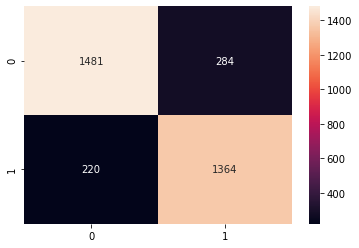

In [157]:
#fit the model
gradB = GradientBoostingClassifier(random_state=42)
gradB.fit(X_train_transformed,y_train)

#make predictions
PredicGradB = gradB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicGradB)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicGradB)
acc_score1 = accuracy_score(y_test, PredicGradB)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [134]:
gradB_meanVscore = cross_val_score(gradB, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", gradB_meanVscore)

Mean Accuracy:  0.8460253640729973


###### Grid Search

In [167]:
gradB_param_grid = [{'max_depth':[3, 8, 16], 'max_features':[None, 'sqrt', 'auto']}]
gradB_grid_Search = grid_search(gradB, gradB_param_grid)

Obtaining Best Model for GradientBoostingClassifier
Best Parameters:  {'max_depth': 8, 'max_features': None}
Best Scores:  0.8583125461312047

Results for each run of GradientBoostingClassifier...
0.8625046207006879 0.8437192339168496 {'max_depth': 3, 'max_features': None}
0.8555611070228764 0.8406471516822684 {'max_depth': 3, 'max_features': 'sqrt'}
0.8625046207006879 0.8437192339168496 {'max_depth': 3, 'max_features': 'auto'}
0.9866887985922255 0.8583125461312047 {'max_depth': 8, 'max_features': None}
0.9636182063669813 0.8580554811448813 {'max_depth': 8, 'max_features': 'sqrt'}
0.9866887985922255 0.8583125461312047 {'max_depth': 8, 'max_features': 'auto'}
1.0 0.8483301015890025 {'max_depth': 16, 'max_features': None}
1.0 0.8553672760696092 {'max_depth': 16, 'max_features': 'sqrt'}
1.0 0.8483301015890025 {'max_depth': 16, 'max_features': 'auto'}


if we took the best paramaters there will be overfitting lets take other paramaters

In [272]:
gradB_grid_Search.max_depth=3
gradB_grid_Search.max_features='auto'
gradB_grid_Search.fit(X_train_transformed, y_train)

GradientBoostingClassifier(max_features='auto', random_state=42)

### XG Boost

###### First look

Accuracy is at 86 which very high considring 86.4 is the highest i have seen on kaggle
the best one here

[02:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          no       0.89      0.83      0.86      1765
         yes       0.83      0.89      0.86      1584

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349

Accuracy:  0.860256793072559


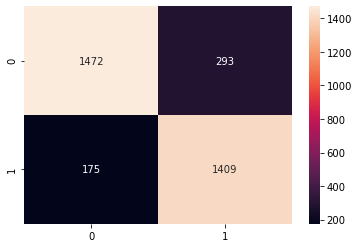

In [160]:
#fit the model
xgb = XGBClassifier(random_state=42,n_jobs=-1)
xgb.fit(X_train_transformed,y_train)

#make predictions
PredicXgb = xgb.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicXgb)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicXgb)
acc_score1 = accuracy_score(y_test, PredicXgb)
print(class_rep1)
print("Accuracy: ", acc_score1)

###### Cross Validation

In [143]:
xgb_meanVscore = cross_val_score(xgb, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
print("Mean Accuracy: ", xgb_meanVscore)

C:\Users\Inons\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Mean Accuracy:  0.8558805049221636

###### Grid Search

In [168]:
xgb_param_grid = [{'max_depth':[4, 8, 16], 'learning_rate':[0.01, 0.1, 1]}]
xgb_grid_Search = grid_search(xgb, xgb_param_grid)

Obtaining Best Model for XGBClassifier


C:\Users\Inons\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 8}
Best Scores:  0.8581834401979842

Results for each run of XGBClassifier...
0.8113719481682932 0.8032754896154101 {'learning_rate': 0.01, 'max_depth': 4}
0.8746639603263479 0.8414172816811296 {'learning_rate': 0.01, 'max_depth': 8}
0.9439394708046713 0.8432088722645886 {'learning_rate': 0.01, 'max_depth': 16}
0.8757197862741961 0.849735439332909 {'learning_rate': 0.1, 'max_depth': 4}
0.945219342825148 0.8581834401979842 {'learning_rate': 0.1, 'max_depth': 8}
0.9997440307150857 0.8525511938612423 {'learning_rate': 0.1, 'max_depth': 16}
0.9822731722924332 0.8369380594624574 {'learning_rate': 1, 'max_depth': 4}
1.0 0.836167929463

## Model Evaluation

In [209]:
logR_Result = logR_grid_Search.score(X_test_transformed,y_test)
Knn_Result = Knn_grid_Search.score(X_test_transformed,y_test)
dTree_Result = dTree_grid_Search.score(X_test_transformed,y_test)
RFor_Result = RFor_grid_Search.score(X_test_transformed,y_test)
gradB_Result = gradB_grid_Search.score(X_test_transformed,y_test)
xgb_Result = xgb_grid_Search.score(X_test_transformed,y_test)
new_Result = [logR_Result,Knn_Result,dTree_Result,RFor_Result,gradB_Result,xgb_Result]

print("Logistic Regression Result: ",np.around(logR_Result, decimals=4))
print("Knn Result: ",np.around(Knn_Result, decimals=4))
print("Desicion Tree Result: ",np.around(dTree_Result, decimals=4))
print("Random Forest Result: ",np.around(RFor_Result, decimals=4))
print("Gradient Boost Result: ",np.around(gradB_Result, decimals=4))
print("XGBoost Result: ",np.around(xgb_Result, decimals=4))



Logistic Regression Result:  0.825
Knn Result:  0.7289
Desicion Tree Result:  0.8164
Random Forest Result:  0.8435
Gradient Boost Result:  0.8495
XGBoost Result:  0.8656


## Comparison Between Model Scores

We will compare the result of last year final project and this years updates that have been made to the dataset:

Lest start with the comparing the best training models results

In [244]:
print("Last years best result: ", np.around(max(old_Results), decimals=4))
print("This years best result: ", np.around(max(new_Result), decimals=4))

Last years best result:  0.7743
This years best result:  0.8656


There was an improvment of 9 which is a very big improvment and if i were to compare it to kaggle its very high (I saw 86, but i dont know what is the highest one)

And Now compare the result fot the same kind of training models

In [252]:
print("Logistic Regression went from ",np.around(logR_old_Result, decimals=4)," to ",np.around(logR_Result, decimals=4))
print("Knn went from ",np.around(Knn_old_Result, decimals=4)," to ",np.around(Knn_Result, decimals=4) )
print("Desicion Tree went from ",np.around(dtree_old_Result, decimals=4)," to ",np.around(dTree_Result, decimals=4) )

Logistic Regression went from  0.7644  to  0.825
Knn went from  0.754  to  0.7289
Desicion Tree went from  0.7743  to  0.8164


Logistic Regression had the highest improvemnt, thanks to better propressing and Grid Search

Knn actually went down, the preproccesing had a bad effect on knn

Desicion Tree also had a big improvment, thanks to Grid Search

###### Conclusion

The things i learned this year made a huge improvment for example essembly led to a huge improvment,
but I think in addition my understanding of how to realy train a model was very bad last year and thanks to learning how to use pipeline, cross variance and grid search right the improvment was even bigger.

